In [4]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

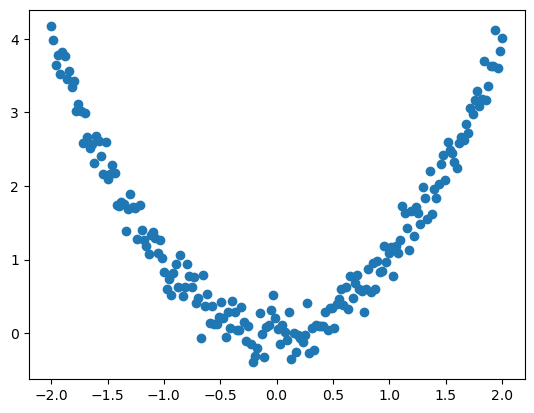

In [ ]:
x_data = np.linspace(-2,2,200)[:,np.newaxis] 
# -2到2生成数，原来是一个200的一维数组 。修改维度，变成一个列向量
# 最好是用reshape来完成
noise = np.random.normal(0, 0.2, x_data.shape)
y_data = np.square(x_data) + noise
plt.scatter(x_data, y_data)
plt.show()

In [22]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)


In [23]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [24]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在__init__()中
# 具体的网络详见Notability
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        # 1-10-1
        self.fc1 = nn.Linear(1,10) # 从输入的一个映射到10个 
        self.tanh = nn.Tanh() # 双曲正弦激活函数
        self.fc2 = nn.Linear(10,1) # fc1 fc2 每一个命名要不一样，对应了不同的参数

    # 定义网络计算
    def forward(self,x):
        x = self.fc1(x) # 数据先传入全连接层，后面一层层传递下去
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [25]:
# 定义模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [ ]:
# 这里就是把权值和偏置值都写出来
# 相当于所有的参数都展示在这里
for name, parameters in model.named_parameters():
    print('name:{}, param:{}'.format(name,parameters))

name:fc1.weight, param:Parameter containing:
tensor([[-0.6157],
        [-0.7128],
        [ 0.1568],
        [-0.5104],
        [-0.2041],
        [ 0.6129],
        [-0.9422],
        [-0.8781],
        [ 0.6184],
        [ 0.7278]], requires_grad=True)
name:fc1.bias, param:Parameter containing:
tensor([ 0.6571, -0.0324, -0.0572,  0.0830,  0.4755, -0.0750, -0.9594, -0.8169,
         0.8758,  0.0059], requires_grad=True)
name:fc2.weight, param:Parameter containing:
tensor([[ 0.0340, -0.1786,  0.0916,  0.1931, -0.2697,  0.1507,  0.0388, -0.2429,
          0.2207, -0.1336]], requires_grad=True)
name:fc2.bias, param:Parameter containing:
tensor([0.1125], requires_grad=True)


In [ ]:
for i in range(2001):
    out = model(inputs) # 这里感觉像是全部放进去看结果的？
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item())

0 2.963094472885132
200 0.1934400200843811
400 0.0598447322845459
600 0.08321850746870041
800 0.06290308386087418
1000 0.0795014277100563
1200 0.07349642366170883
1400 0.06862480938434601
1600 0.06558286398649216
1800 0.063381128013134
2000 0.061775293201208115


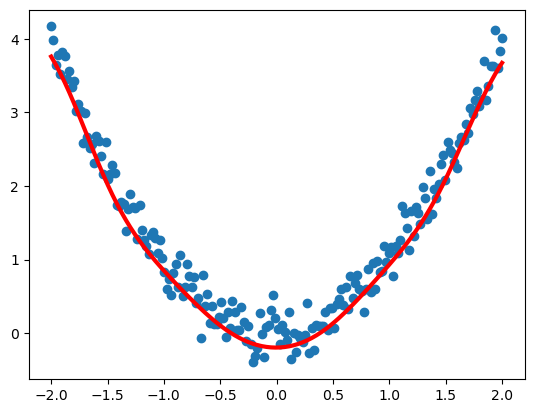

In [28]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()